# Aula 25/03/2025

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_csv('breast_cancer_custom.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                609 non-null    int64  
 1   mean_radius              607 non-null    float64
 2   mean_texture             609 non-null    float64
 3   mean_perimeter           609 non-null    float64
 4   mean_area                609 non-null    float64
 5   mean_smoothness          608 non-null    float64
 6   mean_compactness         609 non-null    float64
 7   mean_concavity           609 non-null    float64
 8   mean_concave_points      609 non-null    float64
 9   mean_symmetry            609 non-null    float64
 10  mean_fractal_dimension   609 non-null    float64
 11  radius_error             609 non-null    float64
 12  texture_error            609 non-null    float64
 13  perimeter_error          609 non-null    float64
 14  area_error               6

In [2]:
dados.head()

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,9012315,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,...,31.03,129.30,1165.0,0.1415,0.4665,0.70870,0.22480,0.4824,0.09614,malignant
1,88147102,15.00,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.03780,0.1881,...,19.31,114.20,808.2,0.1136,0.3627,0.34020,0.13790,0.2954,0.08362,benign
2,879523,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740,malignant
3,862717,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,...,35.27,108.60,906.5,0.1265,0.1943,0.31690,0.11840,0.2651,0.07397,malignant
4,9112085,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,...,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675,benign


In [3]:
del dados['sample_id']
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              607 non-null    float64
 1   mean_texture             609 non-null    float64
 2   mean_perimeter           609 non-null    float64
 3   mean_area                609 non-null    float64
 4   mean_smoothness          608 non-null    float64
 5   mean_compactness         609 non-null    float64
 6   mean_concavity           609 non-null    float64
 7   mean_concave_points      609 non-null    float64
 8   mean_symmetry            609 non-null    float64
 9   mean_fractal_dimension   609 non-null    float64
 10  radius_error             609 non-null    float64
 11  texture_error            609 non-null    float64
 12  perimeter_error          609 non-null    float64
 13  area_error               609 non-null    float64
 14  smoothness_error         6

In [4]:
dados.isnull().sum()

,0
mean_radius,2
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,1
mean_compactness,0
mean_concavity,0
mean_concave_points,0
mean_symmetry,0
mean_fractal_dimension,0


In [5]:
dados_sem_nan = dados.copy().dropna() # dropa os nan
dados_sem_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 607
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              600 non-null    float64
 1   mean_texture             600 non-null    float64
 2   mean_perimeter           600 non-null    float64
 3   mean_area                600 non-null    float64
 4   mean_smoothness          600 non-null    float64
 5   mean_compactness         600 non-null    float64
 6   mean_concavity           600 non-null    float64
 7   mean_concave_points      600 non-null    float64
 8   mean_symmetry            600 non-null    float64
 9   mean_fractal_dimension   600 non-null    float64
 10  radius_error             600 non-null    float64
 11  texture_error            600 non-null    float64
 12  perimeter_error          600 non-null    float64
 13  area_error               600 non-null    float64
 14  smoothness_error         600 no

In [6]:
# ou então, podemos fazer uma seleção dos atributos faltantes

colunas_com_nan = [col for col in dados.columns if dados[col].isnull().any()]
colunas_com_nan

['mean_radius',
 'mean_smoothness',
 'worst_perimeter',
 'worst_concave_points',
 'worst_fractal_dimension']

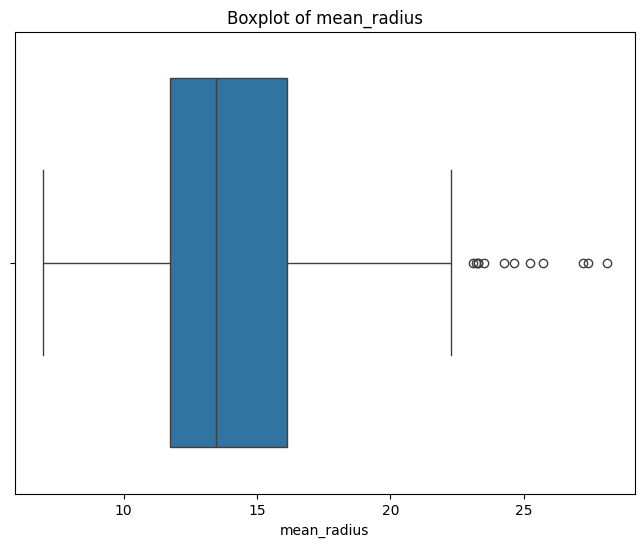

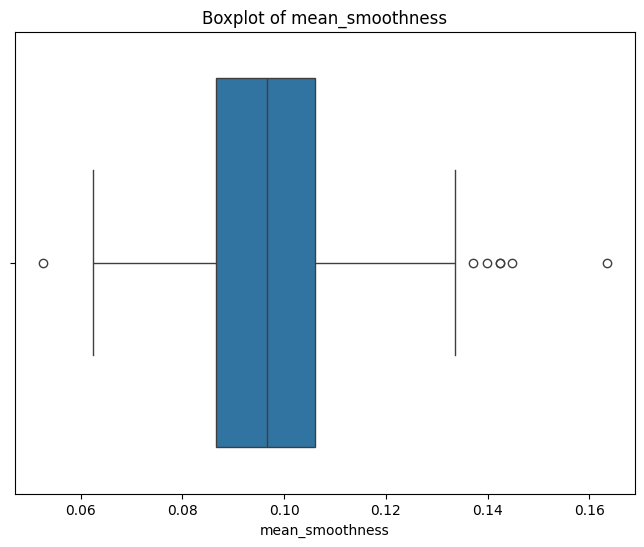

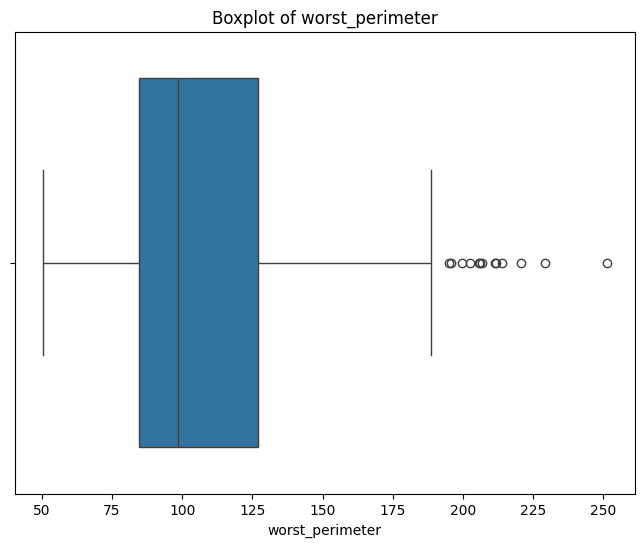

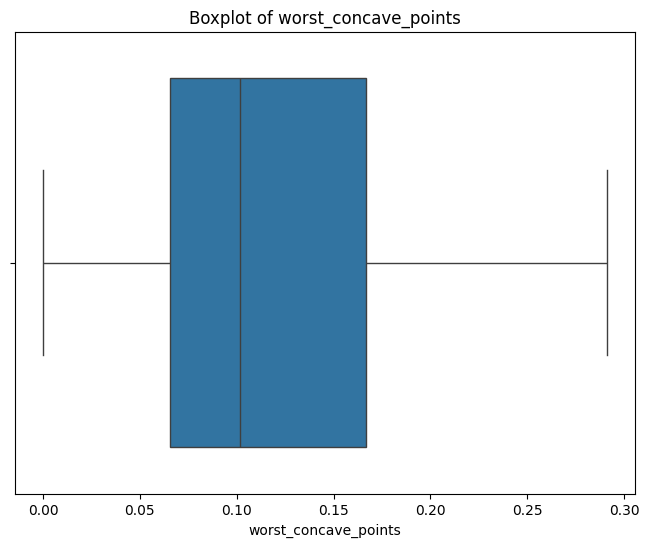

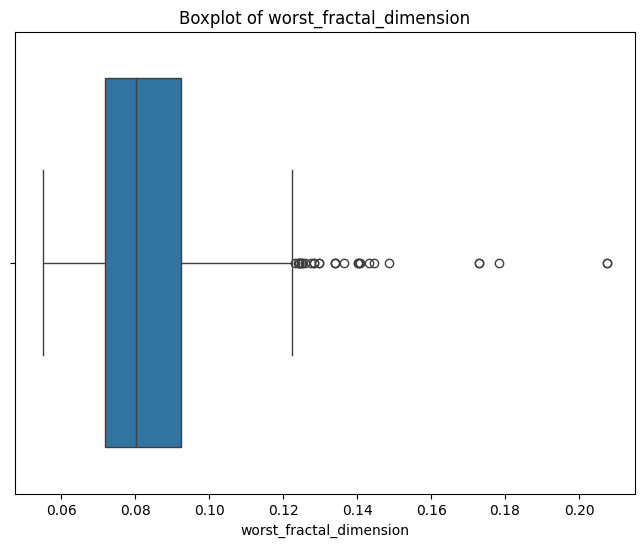

In [7]:
for coluna in colunas_com_nan:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=dados[coluna])
  plt.title(f'Boxplot of {coluna}')
  plt.show()

<Axes: xlabel='worst_concave_points', ylabel='Count'>

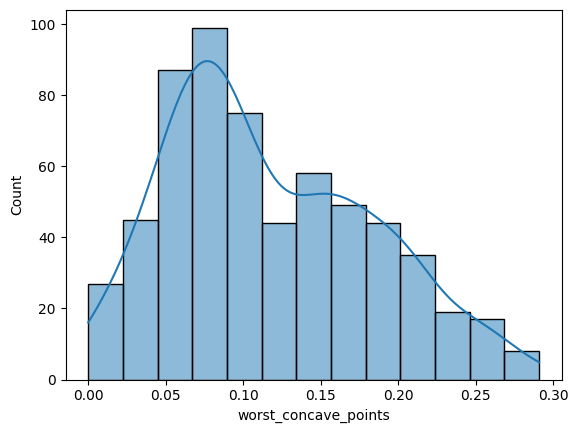

In [8]:
sns.histplot(dados['worst_concave_points'], kde=True)

In [9]:
for coluna in colunas_com_nan:
  mediana = dados[coluna].median()
  print(f'Coluna: {coluna}')
  dados[coluna] = dados[coluna].fillna(mediana)

Coluna: mean_radius
Coluna: mean_smoothness
Coluna: worst_perimeter
Coluna: worst_concave_points
Coluna: worst_fractal_dimension


In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              609 non-null    float64
 1   mean_texture             609 non-null    float64
 2   mean_perimeter           609 non-null    float64
 3   mean_area                609 non-null    float64
 4   mean_smoothness          609 non-null    float64
 5   mean_compactness         609 non-null    float64
 6   mean_concavity           609 non-null    float64
 7   mean_concave_points      609 non-null    float64
 8   mean_symmetry            609 non-null    float64
 9   mean_fractal_dimension   609 non-null    float64
 10  radius_error             609 non-null    float64
 11  texture_error            609 non-null    float64
 12  perimeter_error          609 non-null    float64
 13  area_error               609 non-null    float64
 14  smoothness_error         6

# Detecção de Dados Redundantes

In [11]:
dados.duplicated().sum()

np.int64(25)

In [12]:
# como existem 25 dados duplicados, podemos tirar essas linhas

dados = dados.drop_duplicates()
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 0 to 608
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              584 non-null    float64
 1   mean_texture             584 non-null    float64
 2   mean_perimeter           584 non-null    float64
 3   mean_area                584 non-null    float64
 4   mean_smoothness          584 non-null    float64
 5   mean_compactness         584 non-null    float64
 6   mean_concavity           584 non-null    float64
 7   mean_concave_points      584 non-null    float64
 8   mean_symmetry            584 non-null    float64
 9   mean_fractal_dimension   584 non-null    float64
 10  radius_error             584 non-null    float64
 11  texture_error            584 non-null    float64
 12  perimeter_error          584 non-null    float64
 13  area_error               584 non-null    float64
 14  smoothness_error         584 no

# Detecção de Outliers

In [13]:
dados.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,14.157704,19.328288,92.238921,657.690582,0.096648,0.105813,0.090306,0.049704,0.181762,0.062957,...,16.334759,25.777500,107.371190,886.634075,0.133044,0.261080,0.278830,0.116183,0.292345,0.084695
std,3.512410,4.286527,24.213049,350.608846,0.014221,0.053931,0.079781,0.038776,0.027614,0.007294,...,4.825036,6.169183,33.287675,568.102132,0.023264,0.167234,0.214155,0.066009,0.065254,0.019612
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.710000,16.202500,75.412500,420.875000,0.086508,0.065945,0.029837,0.020645,0.162075,0.057697,...,13.057500,21.187500,84.450000,516.475000,0.116950,0.148500,0.117775,0.065253,0.250575,0.071843
50%,13.435000,18.895000,86.890000,555.900000,0.096245,0.094740,0.065395,0.034975,0.179850,0.061545,...,15.030000,25.470000,98.320000,696.050000,0.131600,0.216550,0.232000,0.101750,0.282700,0.080090
75%,15.892500,21.812500,104.400000,789.675000,0.105525,0.131075,0.132675,0.074842,0.196600,0.066360,...,19.002500,29.902500,125.175000,1096.750000,0.146425,0.343200,0.391125,0.165525,0.319600,0.092188
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<ipython-input-17-f0c2d0731ec9>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,6))


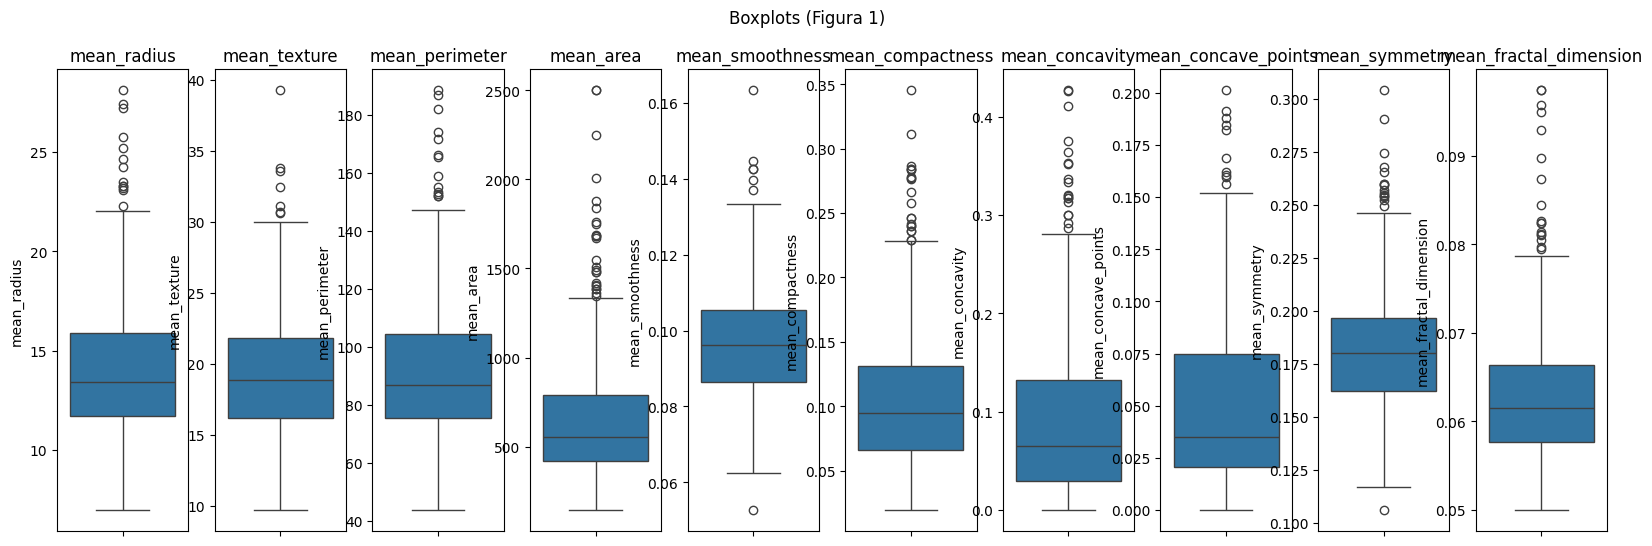

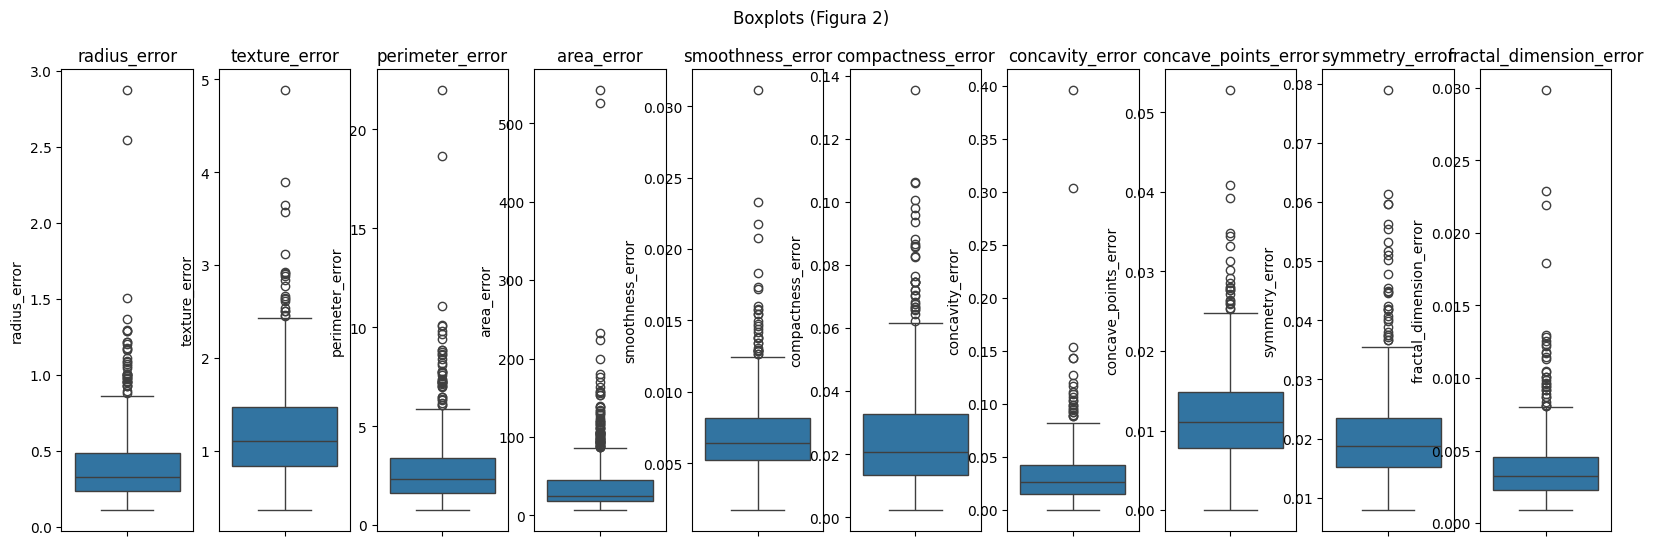

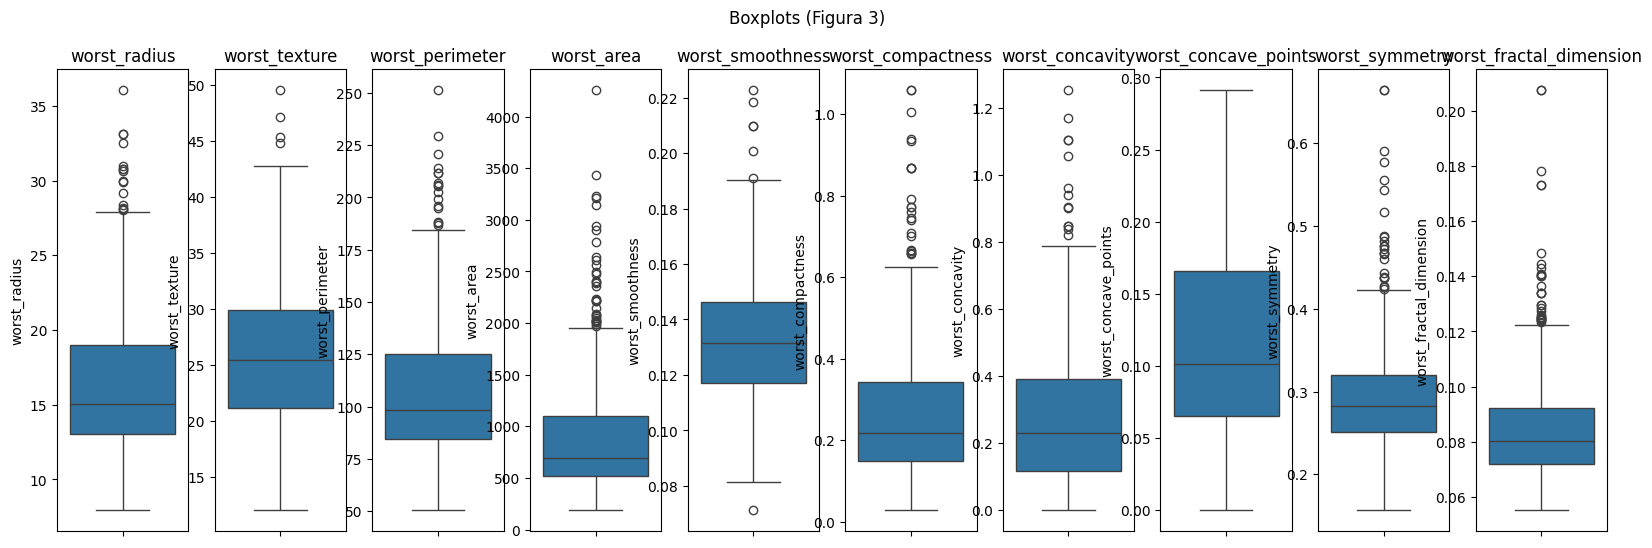

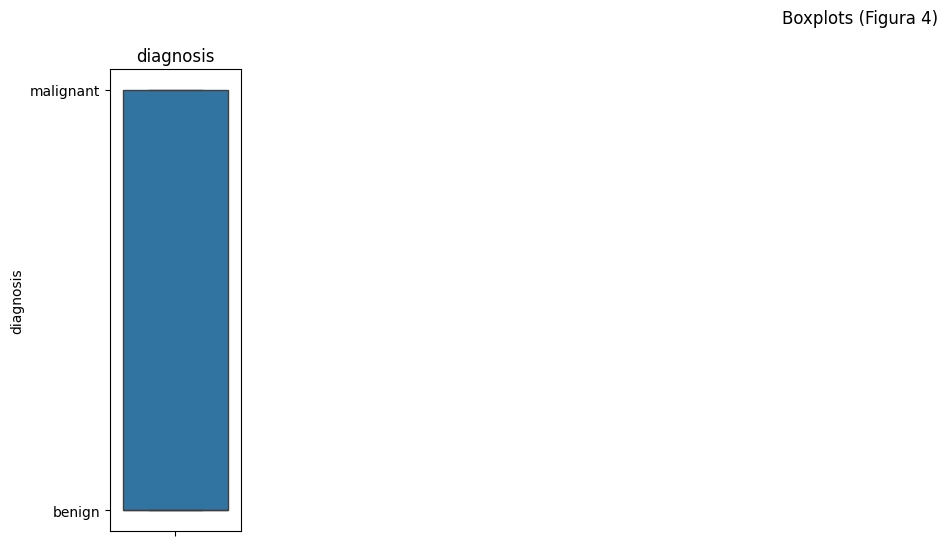

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

In [17]:
# Describre não é fácil para identificar os outliers.

#for coluna in dados.columns:
#  plt.figure(figsie=(8,6))
#  sns.boxplot(x=dados[coluna])
#  plt.title(f'Boxplot of {coluna}')
#  plt.show()

num_plots_per_figure = 10
num_figures = (len(dados.columns) + num_plots_per_figure -1 )

for i in range(num_figures):
  start_index = i * num_plots_per_figure
  end_index = min((i+1) * num_plots_per_figure, len(dados.columns))
  plt.figure(figsize=(20,6))
  plt.suptitle(f'Boxplots (Figura {i+1})')

  for j, coluna in enumerate(dados.columns[start_index:end_index]):
    plt.subplot(1, num_plots_per_figure	, j+1)
    sns.boxplot(y=dados[coluna])
    plt.title(coluna)